In [18]:
# Melanie Schwartz
# sno122

## Lab 5A

*Lab 5 consists of two exercises. This is the first of two exercises, which will cover regressions and time series data.*

In this exercise, you will conduct a simple linear regression analysis on home data value data and plot a regression line on three metropolitan areas in the United States. 

### Dataset 

This exercise will use the CSV file ```Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv```. This dataset comes from [Zillow research data](https://www.zillow.com/research/data/) when you pick the first option in the Data Type menu and "Metro & US" in the Geography menu. 

### Tasks

1. Read in the latest home value csv file from Zillow (see Dataset section above) as a ```DataFrame```. 
2. Clean the dataframe so that you only keep data you need for the following tasks. Create also a column with average prize per per calender year for each region where you combine the monthly prices.
3. Note that the data is in the wide form. You should transform it to the long form using ```melt()```. Only include the data for the metropolitan areas of San Antonio, TX, New York City, NY, and a third area of your choice. Make sure that your third area has data. 
4. Conduct a simple linear regression where the independent variable is the year and the dependent variable is the average home value index for that year for each metroplitan area using ```linregress()```.
5. Using the results of your linear regression analysis to compute the predicted home values for the year 2030.
6. Using the ```regplot()``` command, plot home values in all three regions (the regplot should extend the line to the year 2030.) 
    1. Plot a linear regression for all three areas in one single graph.
    2. Plot a regression curve for all three areas in one single graph by adding the parameter "order = 2" to the regplot commad.
7. Answer the questions below. 

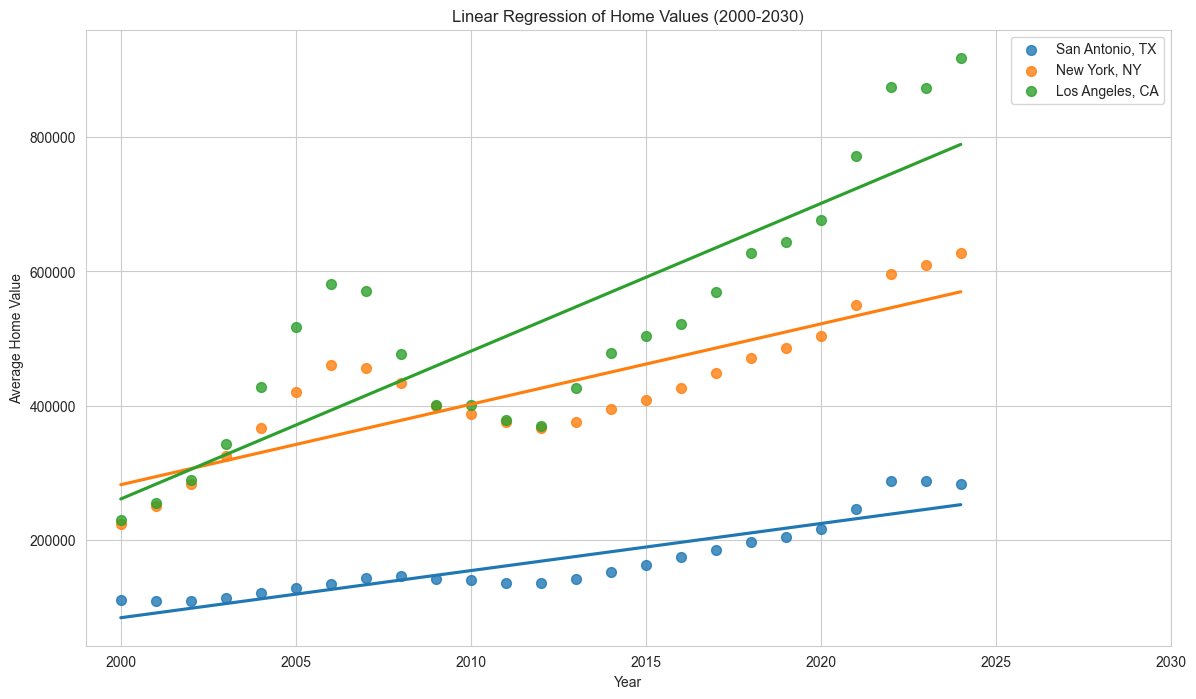

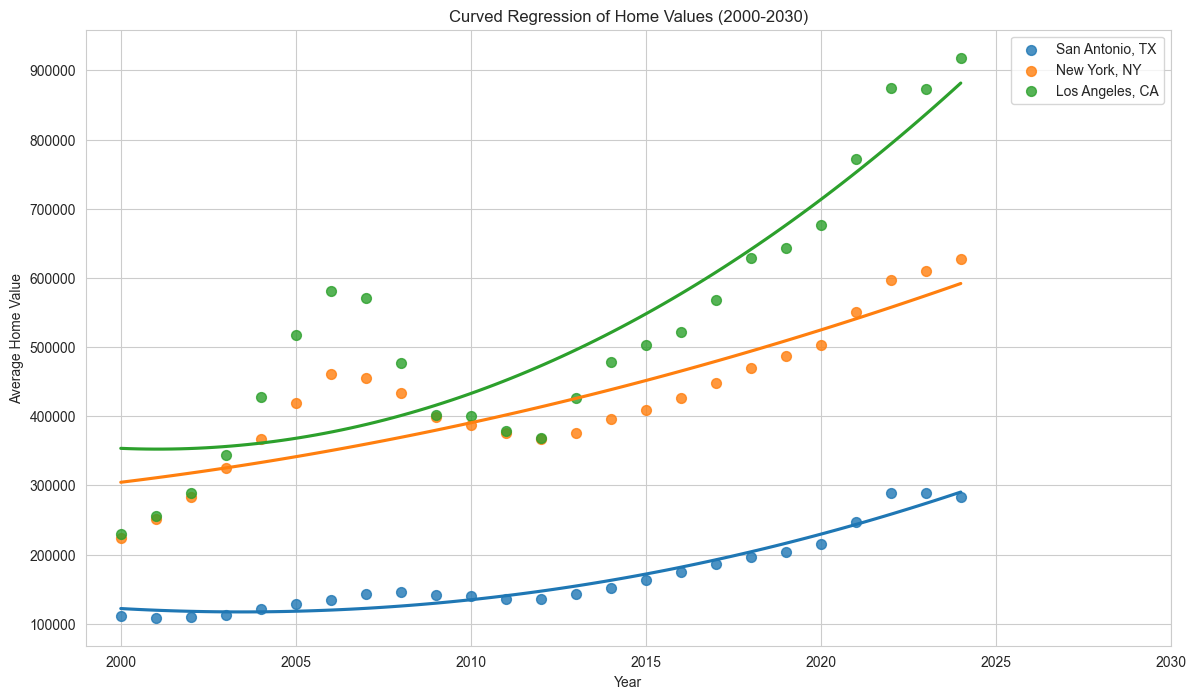

San Antonio, TX: $294,681.42
New York, NY: $641,514.97
Los Angeles, CA: $921,168.81


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import stats

# Your code goes here
# TODO: 1. Read in the latest home value csv file from Zillow (see Dataset section above) as a ```DataFrame```. 
filePath = 'Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
zillowDF = pd.read_csv(filePath)

# TODO: 2. Clean the dataframe so that you only keep data you need for the following tasks. Create also a column with average prize per per calender year for each region where you combine the monthly prices.
# Filter for the areas of interest
metroAreas = ["San Antonio, TX", "New York, NY", "Los Angeles, CA"]
cleanDF = zillowDF[zillowDF['RegionName'].isin(metroAreas)]
cleanDF = cleanDF.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])

# TODO: 3. Note that the data is in the wide form. You should transform it to the long form using ```melt()```. Only include the data for the metropolitan areas of San Antonio, TX, New York City, NY, and a third area of your choice. Make sure that your third area has data. 
meltDF = pd.melt(cleanDF, id_vars=["RegionName"], var_name="Date", value_name="HomeValue")
meltDF['Date'] = pd.to_datetime(meltDF['Date'])
meltDF['Year'] = meltDF['Date'].dt.year

# Calculate the average price per year for each region
averagePPY = meltDF.groupby(['RegionName', 'Year'])['HomeValue'].mean().reset_index()

# TODO: 4. Conduct a simple linear regression where the independent variable is the year and the dependent variable is the average home value index for that year for each metroplitan area using ```linregress()```.
# Perform linear regression for each metro
result = {}
for area in metroAreas:
    metroData = averagePPY[averagePPY['RegionName'] == area]
    slope, intercept, r_value, p_value, std_err = stats.linregress(metroData['Year'], metroData['HomeValue'])
    result[area] = {'slope': slope, 'intercept': intercept}

# TODO: 5. Using the results of your linear regression analysis to compute the predicted home values for the year 2030.
# Predict home values for the year 2030
predicted2030 = {area: result[area]['intercept'] + result[area]['slope'] * 2030 for area in metroAreas}

# Your visualization code goes here
# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# TODO: 6. Using the ```regplot()``` command, plot home values in all three regions (the regplot should extend the line to the year 2030.) 
# TODO: 6.1 Plot a linear regression for all three areas in one single graph.
# Linear regression plot
for area in metroAreas:
    metroData = averagePPY[averagePPY['RegionName'] == area]
    sns.regplot(x='Year', y='HomeValue', data=metroData, label=area, ci=None, scatter_kws={'s':50})

plt.xlim(1999, 2030)
plt.title('Linear Regression of Home Values (2000-2030)')
plt.xlabel('Year')
plt.ylabel('Average Home Value')
plt.legend()
plt.show()

# TODO: 6.2. Plot a regression curve for all three areas in one single graph by adding the parameter "order = 2" to the regplot commad.
# Curved regression plot
plt.figure(figsize=(14, 8))
for area in metroAreas:
    metroData = averagePPY[averagePPY['RegionName'] == area]
    sns.regplot(x='Year', y='HomeValue', data=metroData, label=area, ci=None, scatter_kws={'s':50}, order=2)

plt.xlim(1999, 2030)
plt.title('Curved Regression of Home Values (2000-2030)')
plt.xlabel('Year')
plt.ylabel('Average Home Value')
plt.legend()
plt.show()

# TODO: Based on your linear regression analysis, what are the predicted home values in 2030 in each of your metroplitan areas? 
for area, value in predicted2030.items():
    print(f"{area}: ${value:,.2f}")

### Questions

Answer the following questions:

1. Based on your linear regression analysis, what are the predicted home values in 2030 in each of your metroplitan areas? 

2. How are the predicted home values for 2030 in line with what current real estate trends show with respect to those metroplitan areas? 

3. Looking at your regplot, are there are spikes or dips in home values in past? If so, what are some possible reasons for them in those regions? If there were no major spikes and dips, what are some possible reasons for a steady change in home values for those metropolitan regions? Find some sources to support those explanations.


### Answers

1.  I have printed the values above. By 2030, predicted home values are as follows
San Antonio 294,681.42 - New York, NY 641,514.97 - Los Angeles, CA 921,168.81

2. San Antonio, TX: The predicted value of 294,681 reflects a small, but continued growth in home values. It is comparatively predicted to be a more affordable market compared to the other two metros that were analyzed. New York, NY: A predicted value of approximately 641,514 in New York City indicates a significant increase. New York is already a notoriously expensive market and is projected to steeply continue upward. Los Angeles, CA: With a predicted value of approximately 921,168, Los Angeles is expected to continue seeing substantial home value increases. Much like New York, LA has always been an expensive market and is expected to steadily increase

3. The spikes and dips in home values is a relatively normal historical trend given inventory supply/demand, the status of the economy, and the population density at a given time. In recent years, we have seen more tumultuous highs and lows for home buyers. Cities such as NY and LA have massive populations and have attractable reasons for drawing people to move to these cities. This leads to a high demand for housing with a limited supply - which drives up housing prices. There are also high salary opportunities in these cities which means some residents have more spending power.

Source:
https://propertyclub.nyc/article/why-is-nyc-so-expensive#:~:text=Everyone%20wants%20to%20live%20in,the%20highest%20in%20the%20country.
https://www.latimes.com/opinion/story/2023-09-28/real-estate-housing-prices-income-los-angeles-house-burden
